## Installation command for local Repository

In [1]:
%install '.package(path: "/home/param/GSOC19/github/swiftML")' swiftML

Installing packages:
	.package(path: "/home/param/GSOC19/github/swiftML")
		swiftML
With SwiftPM flags: []
Working in: /tmp/tmp7vsrajw1/swift-install
Completed resolution in 0.40s
Compile Swift Module 'swiftML' (10 sources)
/home/param/GSOC19/github/swiftML/Sources/swiftML/KNeighborsClassifier.swift:133:13: warning: variable 'idx' was written to, but never read
        var idx: Tensor<Int32>
            ^

Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


### Import

In [2]:
import TensorFlow
import swiftML

In [3]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

let np = Python.import("numpy")

let plt = Python.import("matplotlib.pyplot")

### Dataset

In [4]:
let data = Tensor<Float>([[1, 1], [1, 2], [2, 2], [4, 5], [5, 4]])

## KMeans with random initializer

In [5]:

let model = KMeans(nClusters: 2, maxIterations: 100, initializer: "random")
model.fit(X: data)
print("Labels: ",model.labels)
print("Inertia: ",model.inertia)
print("Transform: ",model.transform(X: data))

Labels:  [[1],
 [1],
 [1],
 [0],
 [0]]
Inertia:  2.3333335
Transform:  [[      24.5,  0.5555557],
 [      18.5,  0.2222222],
 [      12.5, 0.55555546],
 [       0.5,  18.222221],
 [       0.5,  18.888887]]


In [6]:
let y = model.labels.makeNumpyArray()
let centroids = model.centroids.makeNumpyArray()

let dataNP = data.makeNumpyArray()
let colors2 = ["red","blue"]

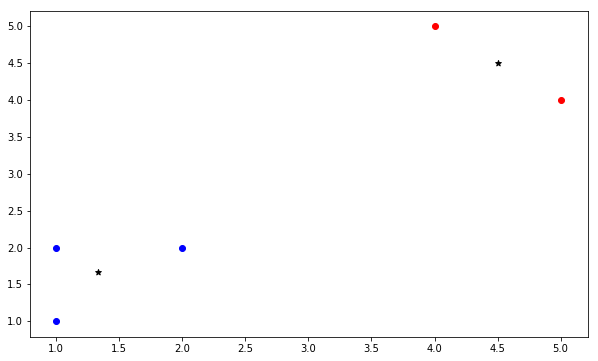

None


In [7]:
plt.figure(figsize: [10, 6])

for i in 0..<data.shape[0] {
    let id:Int = Int(y[i][0])!
    plt.scatter(dataNP[i][0], dataNP[i][1], color: colors2[id])
}

for i in 0..<model.centroids.shape[0] {
    plt.scatter(centroids[i][0], centroids[i][1], color: "black", marker: "*")
}

plt.show()

## Kmeans with Kmean++ initializer

In [8]:
let data = Tensor<Float>([[1, 1], [1, 2], [2, 2], [4, 5], [5, 4]])
let model = KMeans(nClusters: 2, maxIterations: 1, initializer: "kmean++")
model.fit(X: data)
print("Labels: ",model.labels)
print("Inertia: ",model.inertia)
print("Transform: ",model.transform(X: data))

Labels:  [[0],
 [0],
 [0],
 [1],
 [1]]
Inertia:  2.3333335
Transform:  [[ 0.5555557,       24.5],
 [ 0.2222222,       18.5],
 [0.55555546,       12.5],
 [ 18.222221,        0.5],
 [ 18.888887,        0.5]]


In [9]:
let y = model.labels.makeNumpyArray()
let centroids = model.centroids.makeNumpyArray()

let dataNP = data.makeNumpyArray()
let colors2 = ["red","blue"]

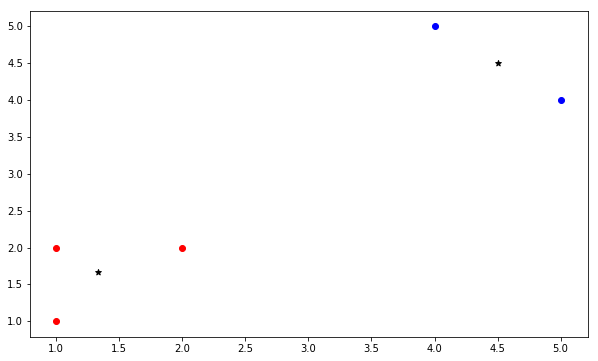

None


In [10]:
plt.figure(figsize: [10, 6])

for i in 0..<data.shape[0] {
    let id:Int = Int(y[i][0])!
    plt.scatter(dataNP[i][0], dataNP[i][1], color: colors2[id])
}

for i in 0..<model.centroids.shape[0] {
    plt.scatter(centroids[i][0], centroids[i][1], color: "black", marker: "*")
}

plt.show()